In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from utils import graph_overfit

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import dill as pkl
import os

In [ ]:
X_train = np.load(os.path.join('data', 'X_train_transformed.npy'), allow_pickle=True)
y_train = np.load(os.path.join('data', 'highlevels_train.pkl'), allow_pickle=True)
X_test = np.load(os.path.join('data', 'X_test_transformed.npy'), allow_pickle=True)
y_test = np.load(os.path.join('data', 'highlevels_test.pkl'), allow_pickle=True)

X_folds = np.load(os.path.join('data', 'X_folds_tuple.npy'), allow_pickle=True)
y_folds = np.load(os.path.join('data', 'y_folds_tuple.npy'), allow_pickle=True)
fold_ids = [(np.array(fold.index)) for fold in X_folds]

In [ ]:
y_train_bin = y_train.iloc[:,y_train.columns.get_loc('gems_wonder_binary'):]
y_test_bin = y_test.iloc[:,y_test.columns.get_loc('gems_wonder_binary'):]

In [ ]:
def custom_cv_folds(fold_ids):
    fold_ids = np.array(fold_ids, dtype=object)
    for n in range(len(fold_ids)):
        all_ids = list(range(len(fold_ids)))
        all_ids.remove(n)
        yield np.concatenate(fold_ids[all_ids]), fold_ids[n]

In [ ]:
custom_cv = custom_cv_folds(fold_ids)

search_grid = {'n_estimators': [100, 500, 1000, 2000],
               'criterion': ['gini', 'entropy', 'log_loss'],
               'min_samples_split': [2, 5, 10, 50],
               'max_features': ['sqrt', 'log2']}

In [ ]:
scores = {}
classifiers = {}
for n, gem in enumerate(y_train_bin.columns):

    clf = RandomForestClassifier()
    custom_cv = custom_cv_folds(fold_ids)

    search_grid = {'n_estimators': [100, 500, 1000, 2000],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'min_samples_split': [2, 5, 10, 50],
                'max_features': ['sqrt', 'log2']}
    
    search_clf = RandomizedSearchCV(clf, search_grid, n_jobs=-1, cv=custom_cv, return_train_score=False)
    search = search_clf.fit(X_train, y_train_bin[gem])

    clf = search.best_estimator_
    clf.fit(X_train, y_train_bin[gem])

    classifiers[gem] = clf
    scores[gem] = {'train': clf.score(X_train, y_train_bin[gem]), 'test': clf.score(X_test, y_test_bin[gem])}
    print(f'{n+1}/{len(y_train_bin.columns)} done')
    print(scores[gem])

pkl.dump(classifiers, open(os.path.join('models', 'gem_classifiers.pkl'), 'wb'))

1/14 done
{'train': 1.0, 'test': 0.6627737226277373}
2/14 done
{'train': 1.0, 'test': 0.7167883211678832}
3/14 done
{'train': 1.0, 'test': 0.8131386861313868}
4/14 done
{'train': 0.9956167814652473, 'test': 0.7766423357664234}
5/14 done
{'train': 0.9943644333124608, 'test': 0.8233576642335766}
6/14 done
{'train': 1.0, 'test': 0.8905109489051095}
7/14 done
{'train': 1.0, 'test': 0.8846715328467153}
8/14 done
{'train': 1.0, 'test': 0.8525547445255475}
9/14 done
{'train': 0.9993738259236068, 'test': 0.8759124087591241}
10/14 done
{'train': 0.9899812147777082, 'test': 0.8189781021897811}
11/14 done
{'train': 1.0, 'test': 0.9124087591240876}
12/14 done
{'train': 1.0, 'test': 0.7678832116788321}
13/14 done
{'train': 0.9862241703193487, 'test': 0.7474452554744525}
14/14 done
{'train': 1.0, 'test': 0.8262773722627738}


In [ ]:
pkl.dump(classifiers, open(os.path.join('models', 'gem_classifiers.pkl'), 'wb'))

Text(0.5, 1.0, 'Random Forrest Test Accuracy')

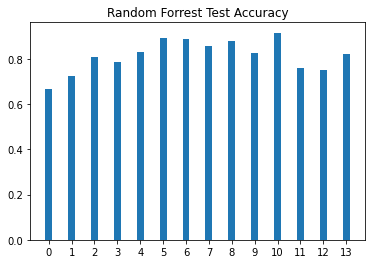

In [ ]:
test_scores_gem = [scores[gem]['test'] for gem in scores.keys()]
plt.bar(x=list(range(len(test_scores_gem))), height=test_scores_gem, width=0.3)
plt.xticks(list(range(len(test_scores_gem))))
plt.title('Random Forrest Test Accuracy')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2905743-bdaf-45dd-a896-9824e6125426' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>